### sklearn.pipeline.Pipeline¶
* class sklearn.pipeline.Pipeline(steps, *, memory=None, verbose=False)

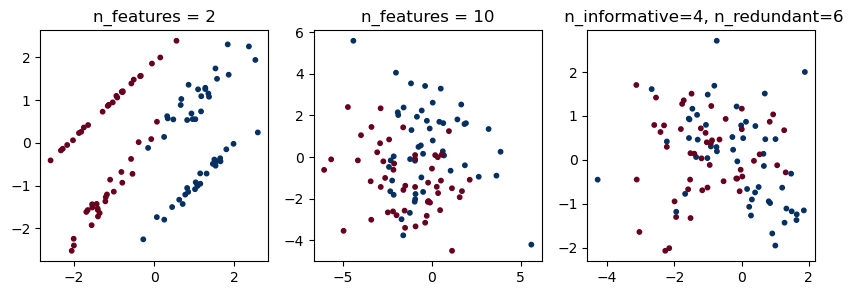

In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

X1, y1 = make_classification(n_samples=100, n_features=2, n_informative=2, 
                             n_redundant=0, n_classes=2, random_state=42)
X2, y2 = make_classification(n_samples=100, n_features=10, n_informative=10, 
                             n_redundant=0, n_classes=2, random_state=42)
X3, y3 = make_classification(n_samples=100, n_features=10, n_informative=4, 
                             n_redundant=6, n_classes=2, random_state=42)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3))

ax1.scatter(X1[:, 0], X1[:, 1], c=y1, cmap=plt.cm.RdBu, s=10)
ax1.set_title("n_features = 2")

ax2.scatter(X2[:, 0], X2[:, 1], c=y2, cmap=plt.cm.RdBu, s=10)
ax2.set_title("n_features = 10")

ax3.scatter(X3[:, 0], X3[:, 1], c=y3, cmap=plt.cm.RdBu, s=10)
ax3.set_title(" n_informative=4, n_redundant=6")
#print(X1.shape, X2.shape, X3.shape)
#(100, 2) (100, 10) (100, 10)
plt.show()

In [2]:
X1

array([[ 0.55942643,  2.38869353],
       [ 1.31217492, -0.7173148 ],
       [-1.5598485 , -1.92487377],
       [-2.2813861 , -0.1368559 ],
       [ 1.56070438, -0.42795824],
       [-0.80804463,  1.19664076],
       [-0.27062383, -2.25553963],
       [ 0.480502  ,  0.54914434],
       [-1.20757158, -1.26898369],
       [ 0.25415746, -1.79532002],
       [ 2.59123946,  0.24472415],
       [ 0.07123641,  0.49429823],
       [-1.17762637, -1.20592943],
       [ 0.93343952,  0.68811892],
       [ 1.65214494, -0.35885569],
       [-1.40735658, -1.56826626],
       [ 1.02255619, -1.08324727],
       [-0.81680628, -0.6795874 ],
       [ 1.50575249, -0.38919817],
       [-2.17105282, -0.04862909],
       [ 0.71479373, -1.42922002],
       [-0.15013844, -0.11708689],
       [-1.4117586 , -1.5332749 ],
       [-2.58590856, -0.40925706],
       [ 0.82600732, -1.05383855],
       [-0.07133524,  0.08896214],
       [ 0.6273745 , -1.32933233],
       [ 1.65882246, -0.43131517],
       [ 1.2798899 ,

In [3]:
from sklearn.datasets import make_regression,make_classification

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

X, y = make_classification(n_samples=100,n_features=10,n_informative=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

# it takes a list of tuples as parameter
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', DecisionTreeClassifier(random_state=112))
	])

# use the pipeline object as you would
# a regular classifier
pipeline.fit(X_train,y_train)


y_preds = pipeline.predict(X_test)

accuracy_score(y_test,y_preds)

0.8787878787878788

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

# it takes a list of tuples as parameter
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', DecisionTreeClassifier(random_state=112))
	])

# use the pipeline object as you would
# a regular classifier
pipeline.fit(X_train,y_train)


y_preds = pipeline.predict(X_test)

accuracy_score(y_test,y_preds)

0.98

In [5]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

# it takes a list of tuples as parameter
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', LogisticRegression(random_state=112))
	])

# use the pipeline object as you would
# a regular classifier
pipeline.fit(X_train,y_train)


y_preds = pipeline.predict(X_test)

accuracy_score(y_test,y_preds)

# 이게 다 뭐노

0.98

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

# it takes a list of tuples as parameter
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', DecisionTreeClassifier(random_state=112))
	])

scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=5)
scores

array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

In [7]:
import numpy as np

np.mean(scores)

0.9600000000000002

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

# it takes a list of tuples as parameter
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', RandomForestClassifier(random_state=112))
	])

param_grid = {
    'clf__max_depth' : [3, 5, 7, 9], 
    'clf__min_samples_split' : [4, 6, 8]
    }

iris_grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, 
             cv=5, scoring='accuracy', refit=True)
iris_grid.fit(X_train, y_train)

iris_grid.best_score_


0.9400000000000001

In [9]:
import numpy as np

scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=5)
np.mean(scores)

# GridSearch랑 cross_val_score은 완전히 다른듯 하다.


0.9199999999999999